# Integrantes
* ### David Herrera
* ### Estid Lozano

In [485]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import itertools as it

# Exercise 1


## 1) Suppose that we have a linearly separable dataset with instances for both positive and negative classes, and we have an optimal hyperplane h computed by the SVM (for linearly separable problems). Show that there is at least one support vector for either of the two classes for h.



If **h** is optimal, its weight is calculated using:

$ \LARGE h^* = \argmax_h({{\delta^*}_h}) = \argmax_{w,b}(\frac{1}{\lvert w \rvert})$

and using lagrange we get:

$\LARGE \min \boldsymbol{L} =\frac{1}{2} {\lvert w \rvert}^2- \sum_{i=1}^{n} \alpha_{i}(y_i(w^t x_i+b)-1) $

and we find:

$ \LARGE \frac{\delta}{\delta b}L=\sum_{i=1}^{n} \alpha_i y_i = 0$ and $\LARGE W = \sum_{i=1}^{n} \alpha_i y_i x_i  $

* the points with $\alpha_i= 0$ are not support vectors and thus do not play a role in determining w
* making at least two points with different classes are in D


## 2) Show that 
$$  \frac{\delta (w^2 / 2)}{\delta w_{k}}= w_{k} $$

$$
\LARGE
w= 
\begin{pmatrix}
   w_{1} \\
   w_{2} \\
   w_{3} \\
   . \\
   . \\
   w_{n} \\
\end{pmatrix}
\rarr
{w^2 \over 2 }= 
\begin{pmatrix}
   w_{1}^2 \over 2 \\
   w_{2}^2 \over 2 \\
   w_{3}^2 \over 2 \\
   . \\
   . \\
   w_{n}^2 \over 2 \\
\end{pmatrix}
\rarr

{ \delta (w^2 / 2) \over \delta w_{k}}= 
\begin{pmatrix}
   \delta (w_{1}^2 / 2 ) \over \delta w_{k} \\
   \delta (w_{2}^2 / 2 ) \over \delta w_{k} \\
   \delta (w_{3}^2 / 2 ) \over \delta w_{k} \\
   . \\
   \delta (w_{k}^2 / 2 ) \over \delta w_{k} \\
   . \\
   \delta (w_{n}^2 / 2 ) \over \delta w_{k}\\
\end{pmatrix}

\rarr

{ \delta (w^2 / 2) \over \delta w_{k}}= 
\begin{pmatrix}
   0 \\
   0 \\
   0 \\
   . \\
   w_{k}\\
   . \\
   0\\
\end{pmatrix}
=
w_{k}
 
$$

## 3) When solving the optimization problem in Eq. (21.9) directly with a gradient descent algorithm, we need to fix two problems. Describe how you would do this:
### a) it seems that there is no obvious initial solution. Provide an algorithm that will generate a feasible solution for w, b.
1) set 1 in the first position the w vector  and the remainder in 0

2) set b as the average of the first attribute of all points


In [486]:
X = np.array([[1.12, 2.13], [0.56, 1.42], [2.87, 0.99], [2.17, 0.43]])
Y = np.array([-1, -1, 1, 1])
def get_b_w(_X, _Y):
    # find mid point of each class
    mid1 = np.average([x for x, y in zip(_X, _Y) if y == 1], axis=0)
    mid2 = np.average([x for x, y in zip(_X, _Y) if y == -1], axis=0)
    # find mid point
    mid = np.add(mid1, mid2)/2
    # vector between mid points
    u = mid2-mid1
    # perpendicular vector
    v = np.array([-u[1], u[0]])
    # weigths
    w1 = v[1]  # w1=1
    w2 = -v[0]  # w2=-1
    b = (-w1*mid[0])-(w2*mid[1])
    w = np.array([w1, w2])
    return b, w
b, w = get_b_w(X, Y)
print(b, w)


1.4991375000000002 [-1.68   1.065]


### b) On one hand, the gradient of the objective function for b is 0, so we would never adjust it with gradient descent. On the other hand, very small entries in w might violate the linear contraints for any b. Describe an algorithm that determines whether, for a given w, there is a b so that the constraints are satisfied, and that returns such a b

In [487]:
def checkW(_w,_X,_Y):
    return sum([y1-np.dot(_w,x1) for x1,y1 in zip(_X,_Y)])/len(_X)
print(checkW(w,X,Y))

1.4991375000000002


# Exercise 2
Implement a learner SVM (no need for probabilities) that can perform binary classification by determining a maximum margin hyperplane.

Train the SVM using a gradient descent algorithm solving the optimization problem in Eq.
(21.9). Use your algorithms from exercise 1 (3) to use an initial solution, which you then
update using the update rule
wt+1 ← wt − ηwt

Here, η is a step size, which is a parameter of the algorithm. Make sure to update b so that
you maintain a valid solution.

You can use a step size η = 0.1 and ε = 0.01 by default; you can also make your SVM
configurable in these parameters.

Make sure that the weight vector (including the bias weight in the first place) is stored in the
variable w, so that it can be accessed after training.

Implement the predict method in order to obtain predictions from your model.

In [491]:
class SVM():
    def __init__(self, _n=0.1, _e=0.01):
        self._e = _e
        self._n = _n

    def train(self, _X, _Y):
        b, w = get_b_w(_X, _Y)
        w = np.array([b, w[0], w[1]])
        W = [w]
        t = 0
        while(True):
            wCopy = W[-1]
            for x, y in zip(_X, _Y):
                x = np.insert(x, 0, 1, axis=0)
                gradient = None
                if 1 - y * (np.dot(wCopy, x)) <= 0:
                    gradient = wCopy
                else:
                    gradient = wCopy - x*y # sum([y1 * x1 for x1, y1 in zip(_X, _Y)])
                wCopy = wCopy - ((1/(t+1000)) * gradient)
                # wCopy[0] = checkW(wCopy[1:], _X, _Y)
            t += 1
            W.append(wCopy)
            if np.linalg.norm(W[t]-W[t-1]) <= self._e:
                break
        W[-1][0] = checkW(W[-1][1:], _X, _Y)
        self.w = W[-1]

    def predict(self, p):
        res = []
        p = np.insert(p, 0, 1, axis=1)
        for pr in p:
            res.append(np.sign(np.dot(self.w, pr)))
        return res


df = pd.read_csv('iris.csv')
df['species'] = df['species'].apply(lambda s: 1 if s == 'setosa' else -1)
X = df.iloc[:, :2].to_numpy()
Y = df.iloc[:, -1].to_numpy()

model = SVM()
model.train(X, Y)


# Exercise 3
Run the script in the template to obtain plots for all SVM models
obtained for attribute pairs of the Iris dataset (binarized by merging versicolor and virginica).
Is your SVM able to find a perfect separation?

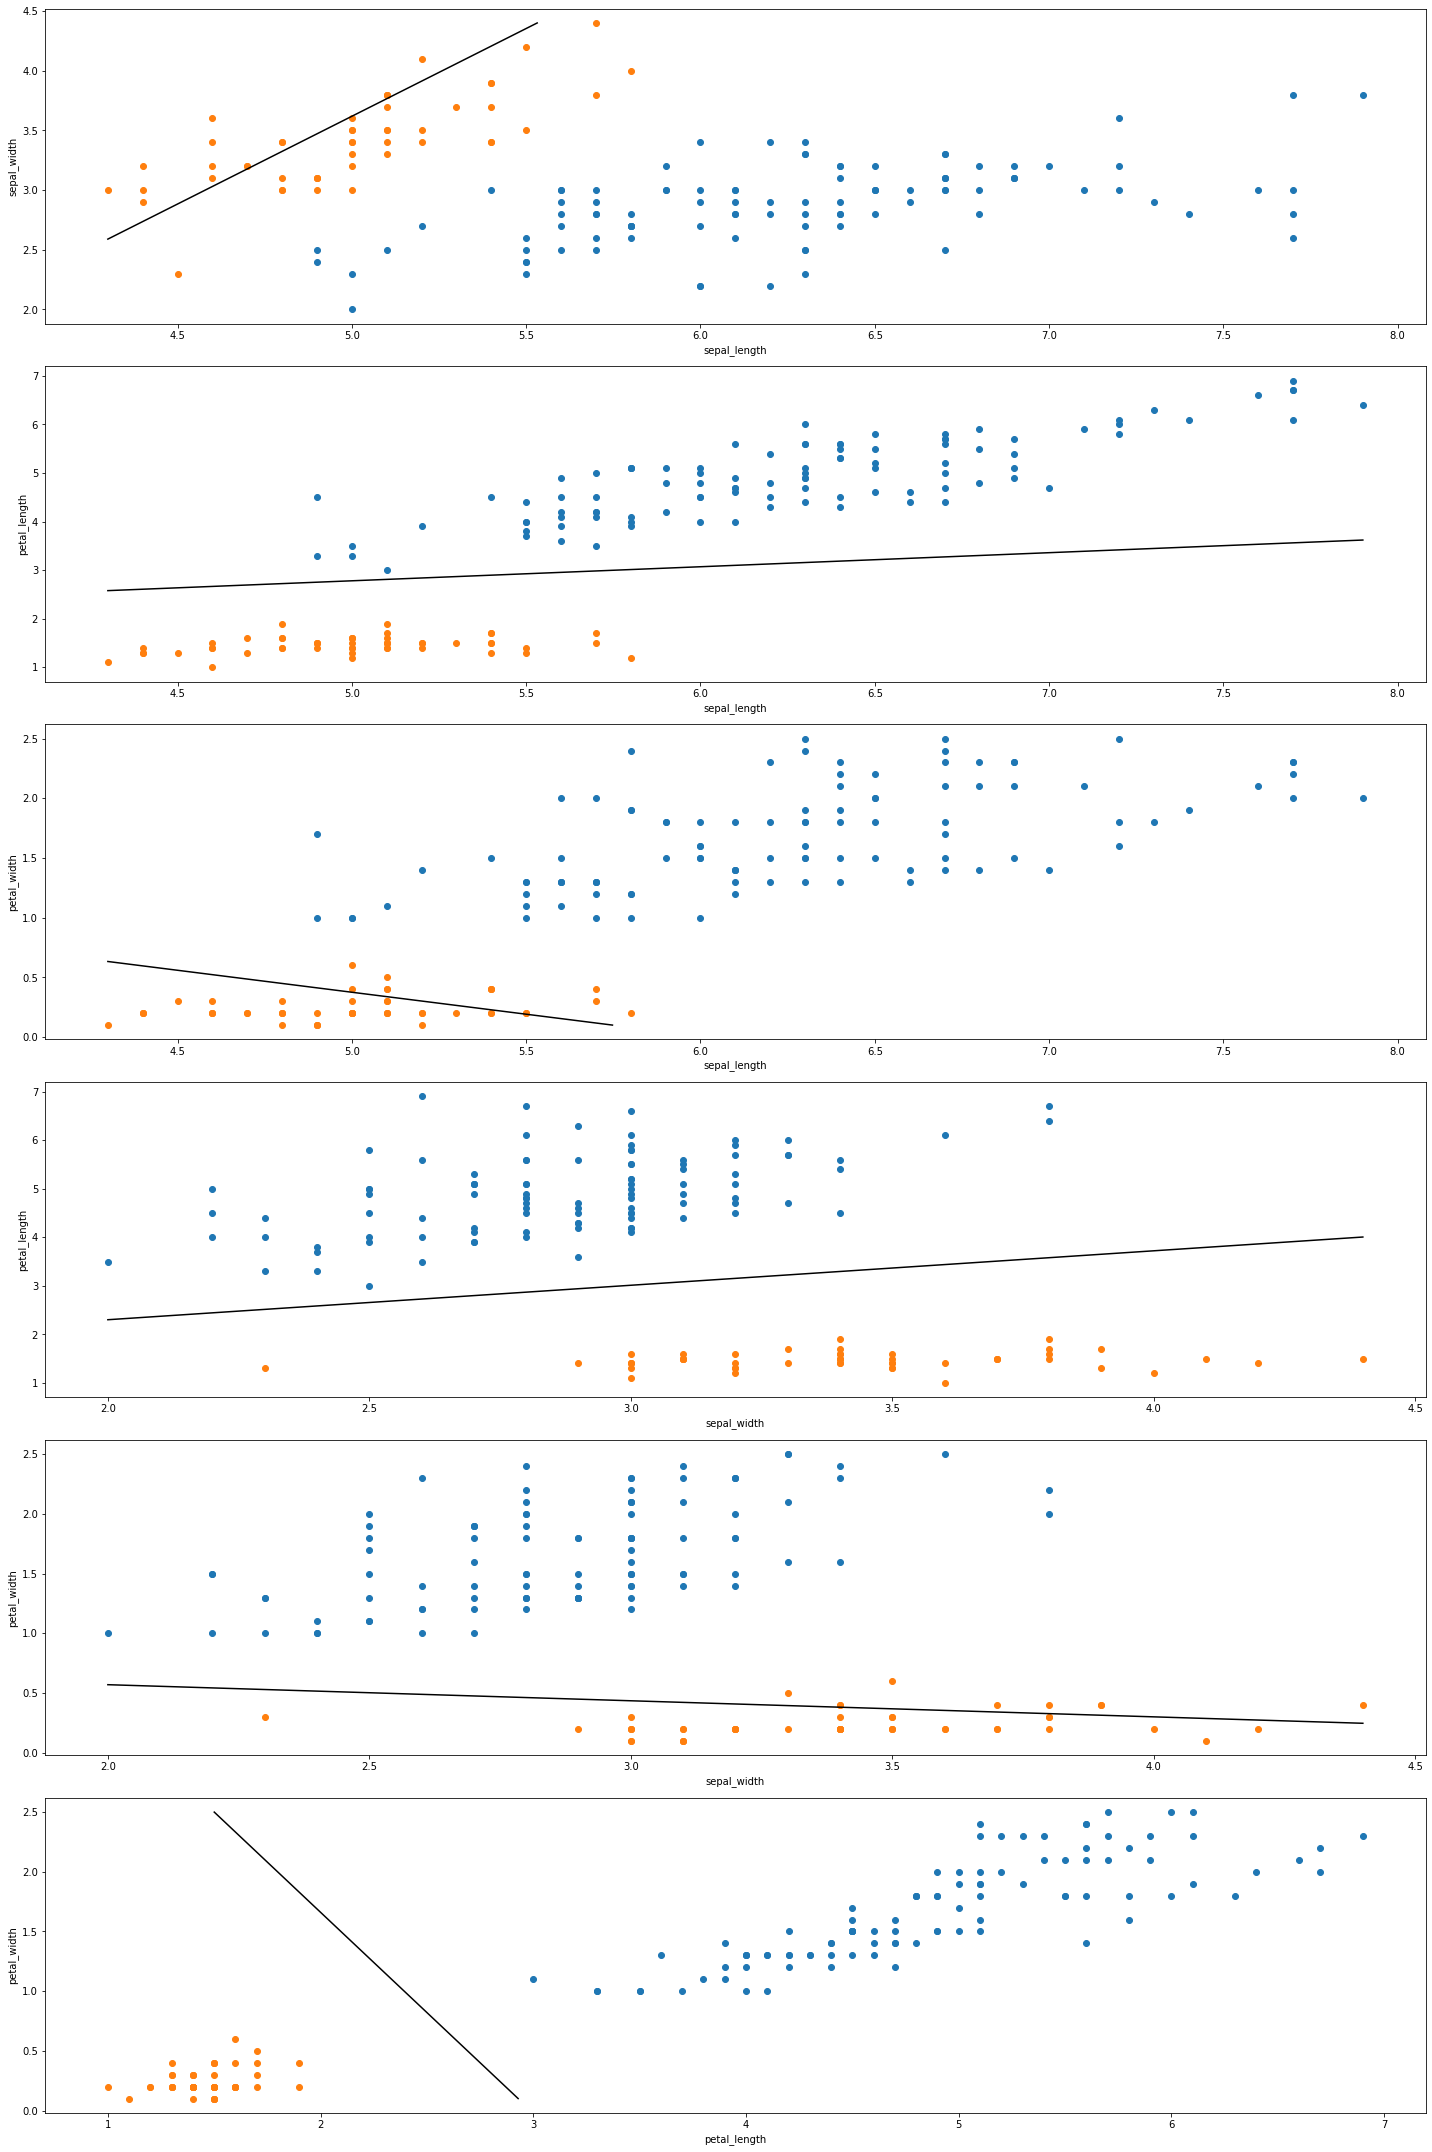

In [492]:
def plotHyperplane(X, y, w, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()
    
    # scatter points
    classes = list(np.unique(y))
    X1 = X[y == classes[0]]
    X2 = X[y == classes[1]]
    ax.scatter(X1[:,0], X1[:,1])
    ax.scatter(X2[:,0], X2[:,1])
    
    # compute slope and intercept representing the hyperplane
    random_vec = np.random.rand(2)
    slope = -w[1] / w[2]
    intercept = -w[0]/w[2]
    a2_min, a2_max = min(X[:,1]), max(X[:,1])
    q1 = (a2_max - intercept) / slope
    q2 = (a2_min - intercept) / slope
    x_from = max(min(X[:,0]), min(q1, q2))
    x_to = min(max(X[:,0]), max(q1, q2))
    hp = lambda x: x * slope + intercept
    
    # plot the hyperplane
    domain = np.linspace(x_from, x_to, 100)
    ax.plot(domain, hp(domain), color="black")
    return ax

dfIris = pd.read_csv("iris.csv")

fig, ax = plt.subplots(6, 1, figsize=(20, 30))

y = dfIris.replace("virginica", "versicolor").values[:,4]
y = np.where(y == 'setosa', 1, -1)

for j, combo in enumerate(it.combinations(range(4), 2)):
    X = dfIris.values[:,combo].astype(float)
    svc = SVM()
    svc.train(X, y)
    plotHyperplane(X, y, svc.w, ax[j])
    # ax[j].set_title("\nSlack: " + str(np.round(np.sum(np.maximum(0, svc.slacks)), 2)))
    predictions = svc.predict(X)
    ax[j].set_xlabel(dfIris.columns[combo[0]])
    ax[j].set_ylabel(dfIris.columns[combo[1]])
fig.tight_layout()